<a href="https://colab.research.google.com/github/kcdheepak/ml-model/blob/main/AI_Resume_Quality_checker(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install textstat

In [7]:
!apt-get install openjdk-17-jdk -y
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-17-openjdk-amd64"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-17-jdk is already the newest version (17.0.14+7-1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


INFO:language_tool_python.download_lt:Unzipping /tmp/tmpgjp2khu2.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://internal1.languagetool.org/snapshots/LanguageTool-latest-snapshot.zip to /root/.cache/language_tool_python.



====== Resume Quality Report ======

Keyword Match (%): 47.38
Readability Score: 22.75
Grammar Bonus: 0
Final Resume Score: 47.38

Missing Keywords: are, abilities, scientist, skills, analysis, we, hiring
Grammar Errors Found: 0

Feedback Summary:
Consider improving keyword matching and readability.
Try adding these keywords: are, abilities, scientist, skills, analysis



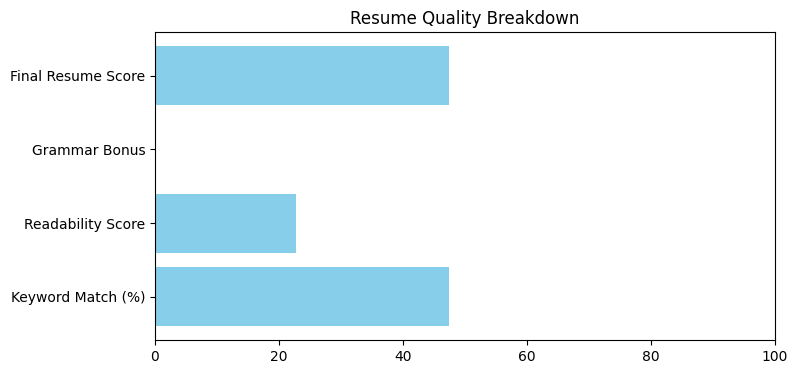

In [8]:
# Install required libraries
!pip install textstat language-tool-python PyMuPDF matplotlib

# Imports
import re
import textstat
import fitz  # PyMuPDF
import language_tool_python
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Upload resume PDF file manually in Colab before running this line
# from google.colab import files
# uploaded = files.upload()

# Extract text from uploaded PDF
resume_text = """
I am a data enthusiast with experience in Python, basic machine learning,
and good communication. I enjoy working with data and solving problems.
"""
# resume_text = extract_text_from_pdf("your_resume.pdf")  # Optional if reading PDF

job_description = """
We are hiring a Data Scientist with skills in Python, machine learning,
data analysis, and good communication abilities.
"""

def extract_text_from_pdf(file_path):
    doc = fitz.open(file_path)
    text = ""
    for page in doc:
        text += page.get_text()
    return text

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    return text

cleaned_resume = clean_text(resume_text)
cleaned_job = clean_text(job_description)

def keyword_match_score(resume, job):
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([resume, job])
    cosine_sim = (vectors * vectors.T).toarray()[0, 1]
    return round(cosine_sim * 100, 2)

def get_readability_score(resume):
    return textstat.flesch_reading_ease(resume)

def suggest_missing_keywords(resume, job):
    resume_words = set(resume.split())
    job_words = set(job.split())
    missing = job_words - resume_words
    return list(missing)

def grammar_errors(text):
    tool = language_tool_python.LanguageTool('en-US')
    matches = tool.check(text)
    return len(matches)

def calculate_resume_score(resume, job):
    match = keyword_match_score(resume, job)
    readability = get_readability_score(resume)
    bonus = 10 if readability > 60 else 0
    final_score = min(match + bonus, 100)
    return {
        "Keyword Match (%)": match,
        "Readability Score": readability,
        "Grammar Bonus": bonus,
        "Final Resume Score": final_score
    }

def generate_feedback(score, missing_keywords, grammar_errors):
    feedback = []
    if score["Final Resume Score"] < 70:
        feedback.append("Consider improving keyword matching and readability.")
    if missing_keywords:
        feedback.append(f"Try adding these keywords: {', '.join(missing_keywords[:5])}")
    if grammar_errors > 5:
        feedback.append("There are many grammar mistakes. Please revise your resume.")
    if not feedback:
        feedback.append("Your resume looks great. Well done!")
    return "\n".join(feedback)

result = calculate_resume_score(cleaned_resume, cleaned_job)
missing_keywords = suggest_missing_keywords(cleaned_resume, cleaned_job)
grammar_issue_count = grammar_errors(resume_text)
feedback = generate_feedback(result, missing_keywords, grammar_issue_count)

print("\n====== Resume Quality Report ======\n")
for key, value in result.items():
    print(f"{key}: {value}")
print(f"\nMissing Keywords: {', '.join(missing_keywords)}")
print(f"Grammar Errors Found: {grammar_issue_count}")
print("\nFeedback Summary:")
print(feedback)
print("\n===================================")

# Visual Score Chart
labels = list(result.keys())
values = list(result.values())
plt.figure(figsize=(8, 4))
plt.barh(labels, values, color='skyblue')
plt.title('Resume Quality Breakdown')
plt.xlim(0, 100)
plt.show()